## 7. Price Analysis of Free vs. Paid Apps

### Step 1: Import Libraries and Load Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset (replace 'dataset.csv' with your file path)
df = pd.read_csv('Google-Playstore-Preprocessed.csv')

# Overview of dataset
print("Dataset Overview:")
print(df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248021 entries, 0 to 1248020
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1248021 non-null  int64  
 1   App Name          1248021 non-null  object 
 2   App Id            1248021 non-null  object 
 3   Category          1248021 non-null  object 
 4   Rating            1248021 non-null  float64
 5   Rating Count      1248021 non-null  float64
 6   Minimum Installs  1248021 non-null  float64
 7   Maximum Installs  1248021 non-null  int64  
 8   Free              1248021 non-null  bool   
 9   Price             1248021 non-null  float64
 10  Currency          1248021 non-null  object 
 11  Size              1248021 non-null  float64
 12  Minimum Android   1248021 non-null  object 
 13  Released          1248021 non-null  object 
 14  Last Updated      1248021 non-null  object 
 15  Content Rating    1248021 non-n

### Step 2: Data Preprocessing

In [3]:
# Handle missing values for Price and Rating
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)  # Convert Price and fill missing values
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())  # Fill missing ratings with mean
df['Minimum Installs'] = pd.to_numeric(df['Minimum Installs'], errors='coerce').fillna(0)

# Create a new column to classify apps as Free (0) or Paid (1)
df['Paid'] = df['Price'].apply(lambda x: 1 if x > 0 else 0)

# Verify preprocessing
print(df[['Price', 'Paid']].head())


   Price  Paid
0    0.0     0
1    0.0     0
2    0.0     0
3    0.0     0
4    0.0     0


### Step 3: Visualization

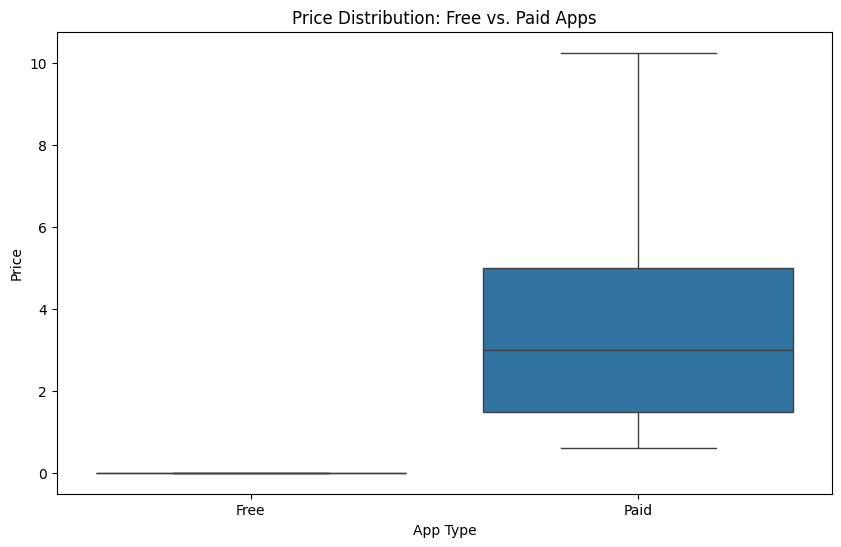

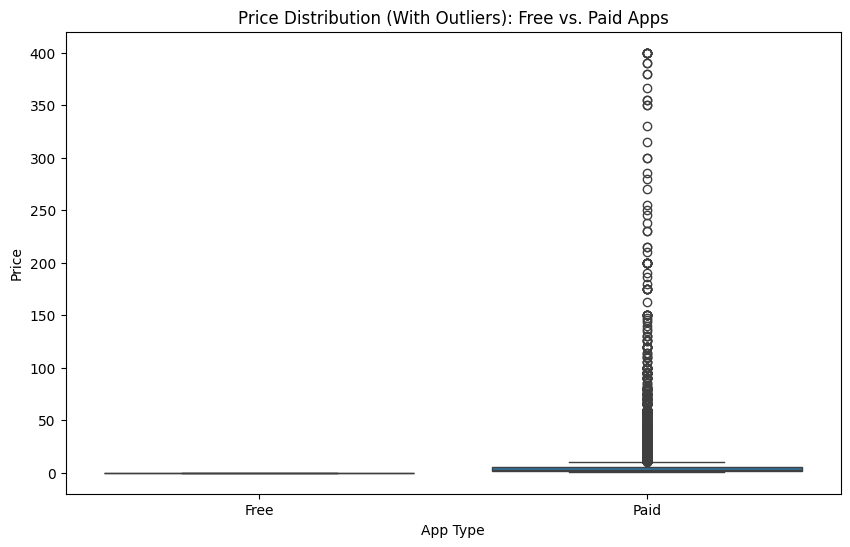

In [4]:
# Compare Free vs. Paid App Prices Using Box Plots

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Paid', y='Price', showfliers=False)
plt.xticks([0, 1], ['Free', 'Paid'])
plt.title('Price Distribution: Free vs. Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Price')
plt.show()

# Optional: Include outliers in a separate box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Paid', y='Price', showfliers=True)
plt.xticks([0, 1], ['Free', 'Paid'])
plt.title('Price Distribution (With Outliers): Free vs. Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Price')
plt.show()


### Step 4: Feedback Loop for Deeper Insights


Feedback Options:
1. Focus on apps with installs over 1 million.
2. Focus on apps with installs under 1 million.
3. Proceed with the entire dataset.
Filtered dataset contains 10475 apps with installs over 1 million.


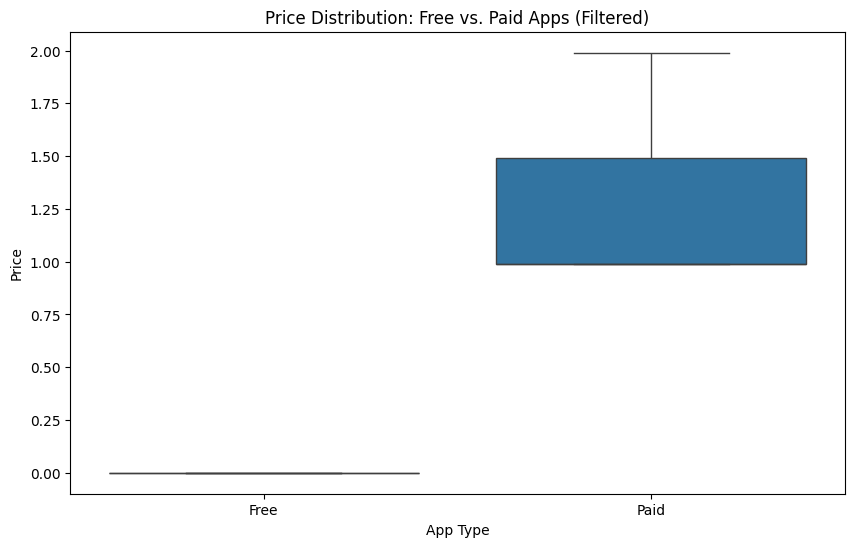

In [5]:
# User Interaction to Focus on Specific Install Ranges

# Prompt user for interaction
print("\nFeedback Options:")
print("1. Focus on apps with installs over 1 million.")
print("2. Focus on apps with installs under 1 million.")
print("3. Proceed with the entire dataset.")
choice = int(input("Enter your choice (1, 2, or 3): "))

if choice == 1:
    filtered_df = df[df['Minimum Installs'] > 1_000_000]
    print(f"Filtered dataset contains {len(filtered_df)} apps with installs over 1 million.")
elif choice == 2:
    filtered_df = df[df['Minimum Installs'] <= 1_000_000]
    print(f"Filtered dataset contains {len(filtered_df)} apps with installs under or equal to 1 million.")
elif choice == 3:
    filtered_df = df
    print("Using the entire dataset.")
else:
    print("Invalid choice. Proceeding with the entire dataset.")
    filtered_df = df

# Visualization for filtered dataset
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Paid', y='Price', showfliers=False)
plt.xticks([0, 1], ['Free', 'Paid'])
plt.title('Price Distribution: Free vs. Paid Apps (Filtered)')
plt.xlabel('App Type')
plt.ylabel('Price')
plt.show()


### Step 5: Analysis of Ratings for Free vs. Paid Apps

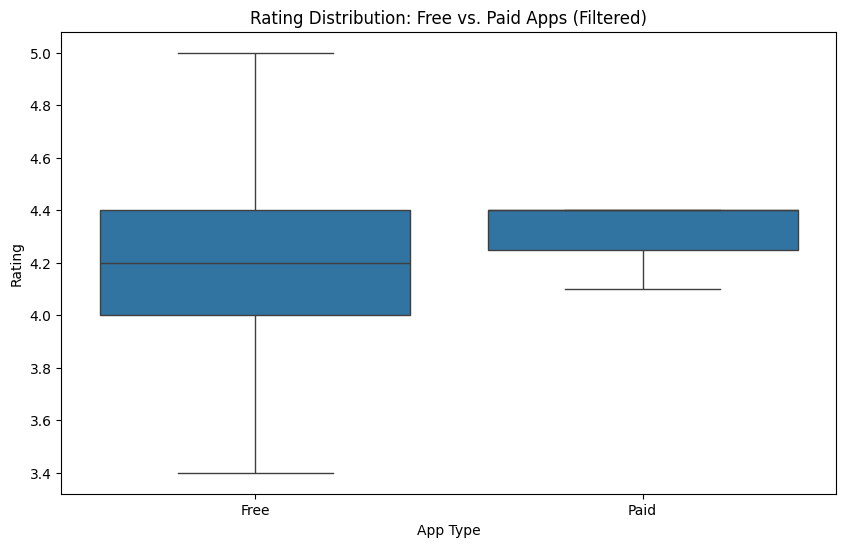

In [6]:
# Visualize Ratings Distribution After Filtering

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Paid', y='Rating', showfliers=False)
plt.xticks([0, 1], ['Free', 'Paid'])
plt.title('Rating Distribution: Free vs. Paid Apps (Filtered)')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.show()
